# Análise Exploratória do dataset do Titanic
***

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib

import math
plt.style.use('ggplot')
from matplotlib.pyplot import figure


matplotlib.rcParams['figure.figsize'] = (9,5)

pd.options.mode.chained_assignment = None

SRC_DIR=os.path.join(os.path.abspath('..'), 'src')
PROJECT_DIR = os.path.dirname(SRC_DIR)
DATA_DIR = os.path.join(PROJECT_DIR, 'data')

In [2]:
input_file='train.csv'
filepath_csv = os.path.join(DATA_DIR, input_file)
df=pd.read_csv(filepath_csv)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(f"Shape dos dados de entrada {df.shape[0]} linhas, {df.shape[1]} features.")

Shape dos dados de entrada 891 linhas, 12 features.


Dropando as variáveis que não acrescentam nada de informação para o EDA: 

    1.PassengerId =  idenficação única do passageiro,
    2.Cabin = identificação da cabine.

In [4]:
df.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
559,1,3,female,36.0,1,0,17.4000,S
794,0,3,male,25.0,0,0,7.8958,S
509,1,3,male,26.0,0,0,56.4958,S
629,0,3,male,NaN,0,0,7.7333,Q
715,0,3,male,19.0,0,0,7.6500,S
809,1,1,female,33.0,1,0,53.1000,S
329,1,1,female,16.0,0,1,57.9792,C
657,0,3,female,32.0,1,1,15.5000,Q
699,0,3,male,42.0,0,0,7.6500,S
128,1,3,female,NaN,1,1,22.3583,C


In [5]:
print('As features e o seu conteúdo')
for cols in df.columns:
    print(cols)
    print(df[cols].value_counts())

As features e o seu conteúdo
Survived
0    549
1    342
Name: Survived, dtype: int64
Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
Sex
male      577
female    314
Name: Sex, dtype: int64
Age
24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64
Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [6]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Temos que só há duas features com dados faltantes: Age(variável numérica) e Embarked(Porto de Embarque)

## Objetivos deste EDA:
***

Descobrir através dos dados quais variáveis são as mais importantes no taxa de sobrevivência de um passageiro  do titanic:

-->**Hipóteses:**

    a.Quem ter maior probabilidade de sobreviver: homens, mulheres ou crianças.

    b.Taxa de sobrevivência por idade, genêro, por classe da viagem.

In [7]:
# Análise estatística variáveis numéricas
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Para a variável Age temos alguns dados faltantes, que podemos inputar pela mediana, separando por grupos de homens e mulheres. 

In [8]:
df.describe(include=['O'])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


Para conduzir a análise exploratória nos dados é interessante, deixar os dados completos, através da imputação, que vai variar de acordo com o tipo de dado.

In [9]:
df.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

Imputando as idades faltantes com valores de mediana utilizando o groupby.

In [10]:
# fillna = df.fillna(value)
fillna_median = lambda grupo: grupo.fillna(grupo.median())

In [11]:
df.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [12]:
df['Age'] = df.groupby('Sex', as_index=False)['Age'].apply(lambda g:g.fillna(g.median())).reset_index(drop=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,38.0,1,0,7.2500,S
1,1,1,female,26.0,1,0,71.2833,C
2,1,3,female,35.0,0,0,7.9250,S
3,1,1,female,27.0,1,0,53.1000,S
4,0,3,male,14.0,0,0,8.0500,S


Para a variável embarque podemos calcular a moda da variável categórica e usar o fillna para preencher.

In [13]:
moda_Embarked = df['Embarked'].mode()
moda_Embarked

0    S
dtype: object

In [14]:
_ = df.fillna({'Embarked' : 'S'}, inplace=True)

In [15]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
df['Survived'] = df.Survived.map({0 : 'No', 1 : 'Yes'})

In [17]:
df['Pclass'] = df.Pclass.map({1 : 'First',
                              2 : 'Second',
                              3 : 'Third'})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 55.8+ KB


In [19]:
categoricos = df.select_dtypes(include=['object']).columns
categoricos

Index(['Survived', 'Pclass', 'Sex', 'Embarked'], dtype='object')

Calculando as taxas de sobrevivência por:

In [20]:
pd.crosstab(df['Survived'], df['Pclass'], margins=True, margins_name='Total')

Pclass,First,Second,Third,Total
Survived,,,,
No,80,97,372,549
Yes,136,87,119,342
Total,216,184,491,891


In [21]:
df[['Survived', 'Pclass']].groupby(['Pclass']).count()

,Survived
Pclass,
First,216
Second,184
Third,491


In [22]:
pd.crosstab(df['Survived'], df['Pclass'], normalize='index')

Pclass,First,Second,Third
Survived,,,
No,0.145719,0.176685,0.677596
Yes,0.397661,0.254386,0.347953


<AxesSubplot:title={'center':'Contagem dos passageiros por classe'}, xlabel='Pclass'>

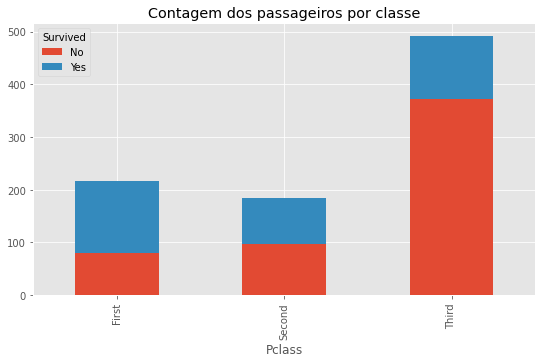

In [23]:
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', 
    title = 'Contagem dos passageiros por classe', stacked = True)

<AxesSubplot:title={'center':'Contagem dos passageiros por classe'}, xlabel='Pclass'>

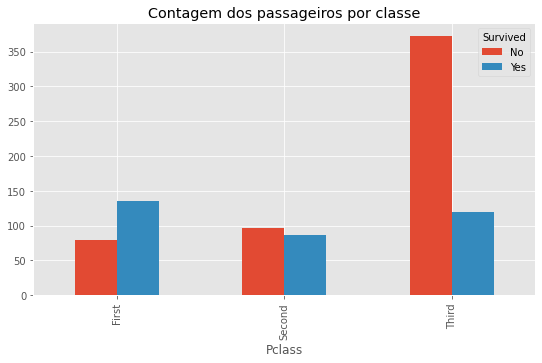

In [24]:
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', 
    title = 'Contagem dos passageiros por classe')

In [25]:
df.groupby('Pclass')['Survived'].count()

Pclass
First     216
Second    184
Third     491
Name: Survived, dtype: int64

In [26]:
df.pivot_table('Survived', 
               index=['Pclass'], 
               aggfunc = 'count')

,Survived
Pclass,
First,216
Second,184
Third,491


In [27]:
age = pd.cut(df['Age'], [0, 18, 38, 58, 80])
age

0      (18, 38]
1      (18, 38]
2      (18, 38]
3      (18, 38]
4       (0, 18]
         ...   
886    (18, 38]
887    (18, 38]
888    (18, 38]
889    (18, 38]
890    (18, 38]
Name: Age, Length: 891, dtype: category
Categories (4, interval[int64]): [(0, 18] < (18, 38] < (38, 58] < (58, 80]]

In [28]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
774,Yes,Second,female,29.0,1,3,23.0,S


<AxesSubplot:xlabel='Pclass'>

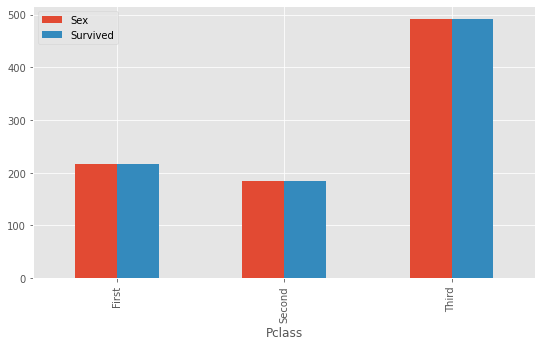

In [29]:
df.groupby('Pclass')[['Sex', 'Survived']].count().plot(kind='bar')